# Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("CG_IPC 15 - 19.csv")
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
Dataset = dataset.set_index(['Month'])

In [3]:
Dataset

,Raipur
Month,
2015-01-01,653
2015-02-01,637
2015-03-01,658
2015-04-01,659
2015-05-01,655
2015-06-01,699
2015-07-01,761
2015-08-01,686
2015-09-01,686


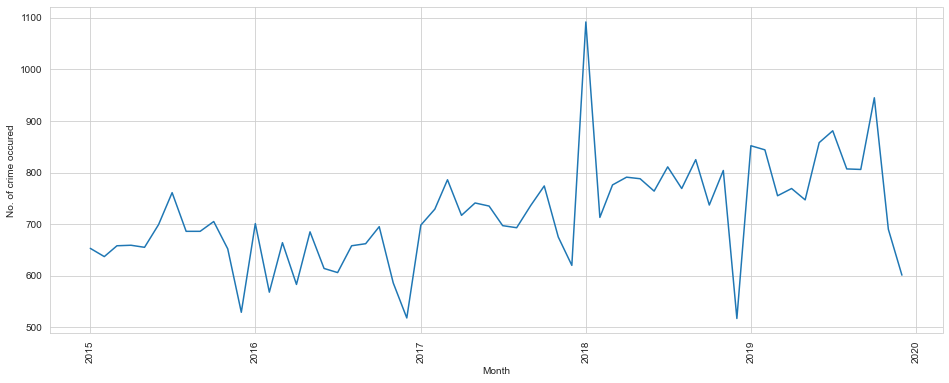

In [4]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("No. of crime occured")
plt.plot(Dataset)

In [5]:
#as we can see the data is not stationary, theres an upward trend..it keeps on fluctuating
#there are 2 diff ways by which you can check the stationarity of the data. 1-by rolling mean and rolling std and 2-by dickey-fuller test 
rolmean = Dataset.rolling(window=12).mean()
rolstd = Dataset.rolling(window=12).std()
print(rolmean, rolstd)

                Raipur
Month                 
2015-01-01         NaN
2015-02-01         NaN
2015-03-01         NaN
2015-04-01         NaN
2015-05-01         NaN
2015-06-01         NaN
2015-07-01         NaN
2015-08-01         NaN
2015-09-01         NaN
2015-10-01         NaN
2015-11-01         NaN
2015-12-01  665.000000
2016-01-01  669.000000
2016-02-01  663.250000
2016-03-01  663.750000
2016-04-01  657.416667
2016-05-01  659.916667
2016-06-01  652.833333
2016-07-01  639.916667
2016-08-01  637.583333
2016-09-01  635.583333
2016-10-01  634.750000
2016-11-01  629.250000
2016-12-01  628.333333
2017-01-01  628.083333
2017-02-01  641.500000
2017-03-01  651.666667
2017-04-01  662.833333
2017-05-01  667.500000
2017-06-01  677.583333
2017-07-01  685.166667
2017-08-01  688.083333
2017-09-01  694.250000
2017-10-01  700.833333
2017-11-01  708.250000
2017-12-01  716.750000
2018-01-01  749.583333
2018-02-01  748.250000
2018-03-01  747.416667
2018-04-01  753.583333
2018-05-01  757.500000
2018-06-01 

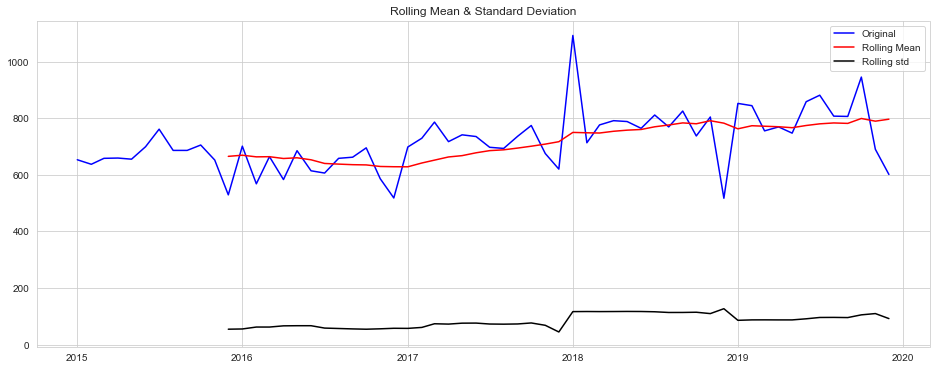

In [6]:
plt.figure(figsize=(16, 6))
orig = plt.plot(Dataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = "Rolling std")
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [7]:
#from the above graph you can see that the std and mean is not constant, it keeps on changing
#dickey fuller test
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(Dataset['Raipur'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value', 'Lags Useed', 'Number of observations Used'])
for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.902926
P-value                         0.330686
Lags Useed                      3.000000
Number of observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


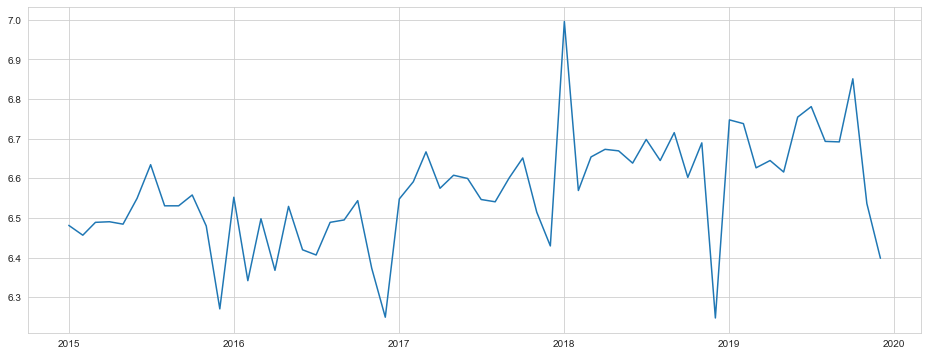

In [8]:
plt.figure(figsize=(16, 6))
Dataset_log = np.log(Dataset)
plt.plot(Dataset_log)

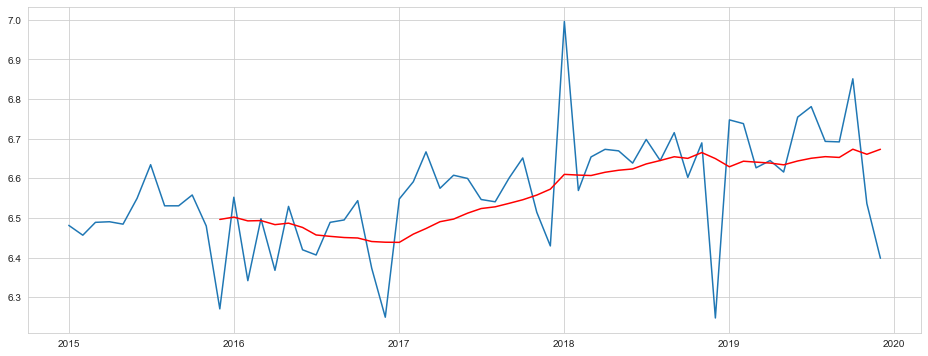

In [9]:
movingAverage = Dataset_log.rolling(window=12).mean()
movingSTD = Dataset_log.rolling(window=12).std()
plt.figure(figsize=(16, 6))
plt.plot(Dataset_log)
plt.plot(movingAverage, color='red')

In [10]:
#finding the difference of the two types
#the data can be made stationary by diff ways such as taking log ,squaring, cube root etc
datasetLogMinusMovingAverage = Dataset_log - movingAverage
datasetLogMinusMovingAverage.head(12)

datasetLogMinusMovingAverage.dropna(inplace=True)
datasetLogMinusMovingAverage.head(10)

,Raipur
Month,
2015-12-01,-0.225527
2016-01-01,0.050082
2016-02-01,-0.150751
2016-03-01,0.004654
2016-04-01,-0.115230
2016-05-01,0.042270
2016-06-01,-0.056349
2016-07-01,-0.050485
2016-08-01,0.035313


In [11]:
# the code for a  DCF 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window= 12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = "Rolling std")
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of D-F Test')
    dftest = adfuller(timeseries['Raipur'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value', 'Lags Useed', 'Number of observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

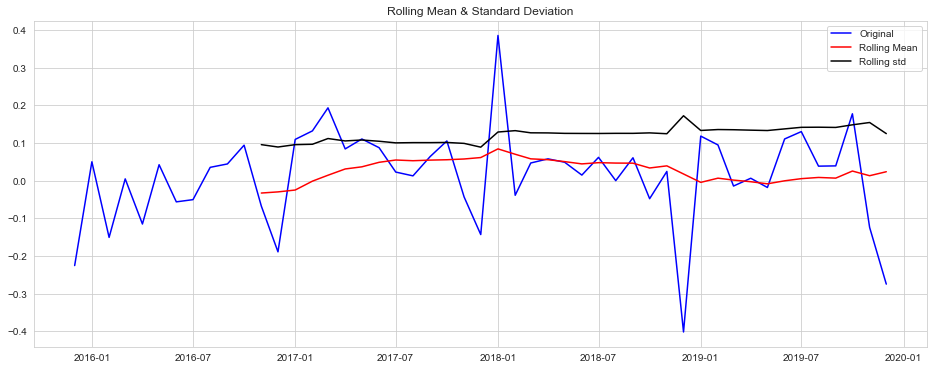

Results of D-F Test
Test Statistic                -7.086270e+00
P-value                        4.530028e-10
Lags Useed                     0.000000e+00
Number of observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
dtype: float64
Test Statistic                -7.086270e+00
P-value                        4.530028e-10
Lags Useed                     0.000000e+00
Number of observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
dtype: float64
Test Statistic                -7.086270e+00
P-value                        4.530028e-10
Lags Useed                     0.000000e+00
Number of observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


In [12]:
plt.figure(figsize=(16, 6))
test_stationarity(datasetLogMinusMovingAverage)

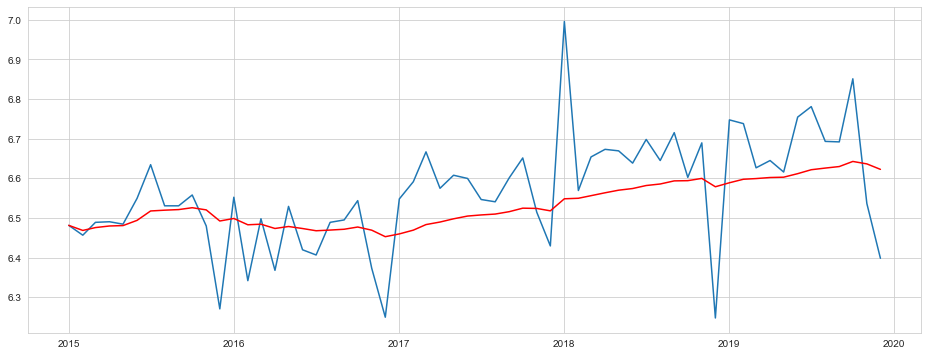

In [13]:
exponentialDecayWeightedAverage = Dataset_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.figure(figsize=(16, 6))
plt.plot(Dataset_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

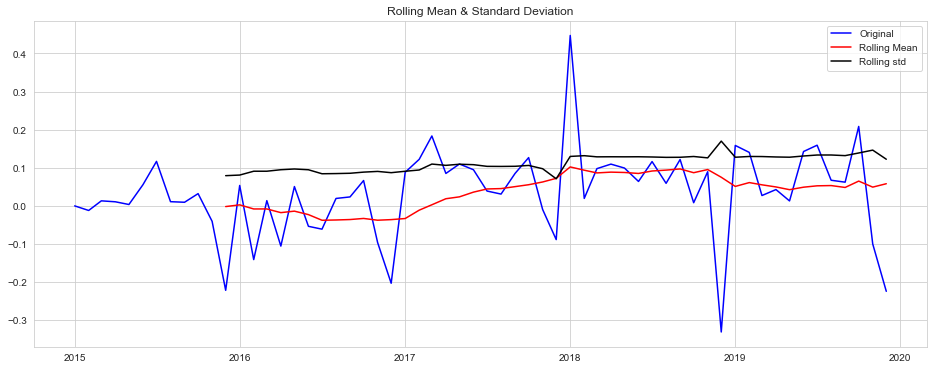

Results of D-F Test
Test Statistic                -7.071144e+00
P-value                        4.933672e-10
Lags Useed                     0.000000e+00
Number of observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
dtype: float64
Test Statistic                -7.071144e+00
P-value                        4.933672e-10
Lags Useed                     0.000000e+00
Number of observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
dtype: float64
Test Statistic                -7.071144e+00
P-value                        4.933672e-10
Lags Useed                     0.000000e+00
Number of observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64


In [14]:
plt.figure(figsize=(16, 6))
datasetLogMinusMovingExponentialDecayAverage = Dataset_log - exponentialDecayWeightedAverage
test_stationarity(datasetLogMinusMovingExponentialDecayAverage)

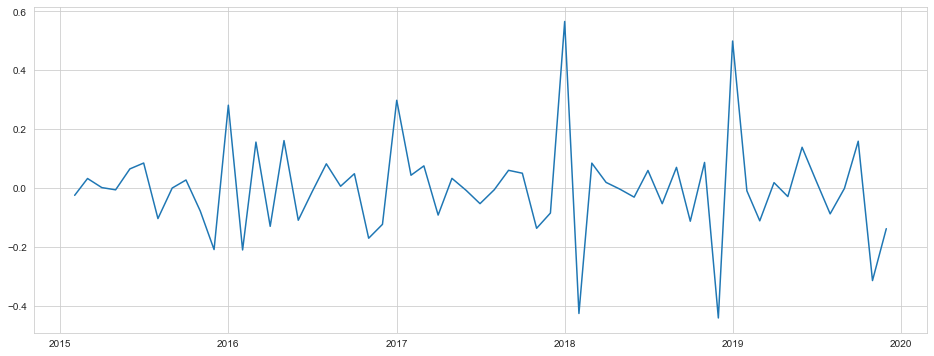

In [15]:
plt.figure(figsize=(16, 6))
datasetLogDiffShifting = Dataset_log - Dataset_log.shift()
plt.plot(datasetLogDiffShifting)

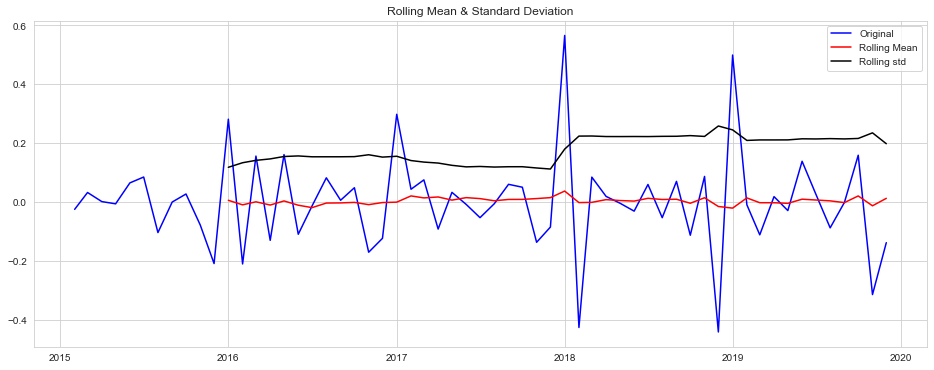

Results of D-F Test
Test Statistic                 -4.006503
P-value                         0.001377
Lags Useed                     10.000000
Number of observations Used    48.000000
Critical Value (1%)            -3.574589
dtype: float64
Test Statistic                 -4.006503
P-value                         0.001377
Lags Useed                     10.000000
Number of observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
dtype: float64
Test Statistic                 -4.006503
P-value                         0.001377
Lags Useed                     10.000000
Number of observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [16]:
plt.figure(figsize=(16, 6))
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

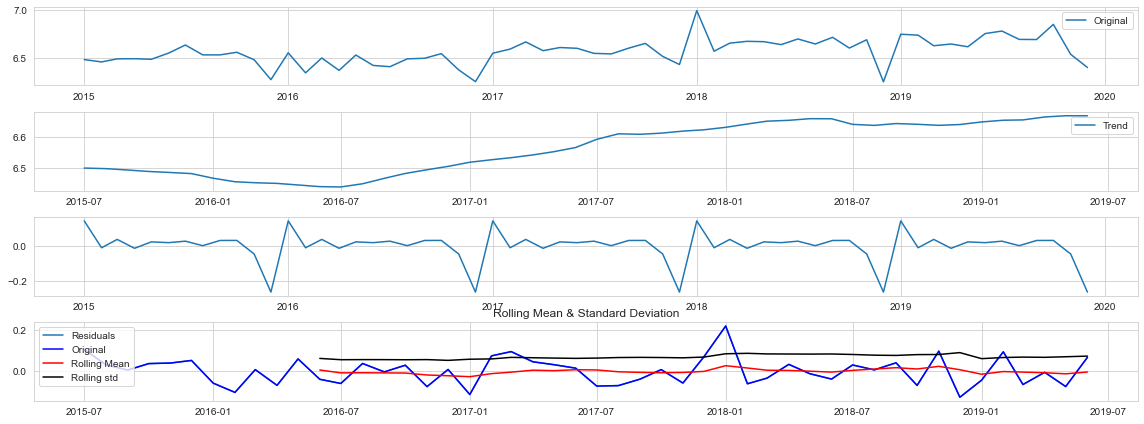

Results of D-F Test


KeyError: 'Raipur'

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Dataset_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 6))
plt.subplot(411)
plt.plot(Dataset_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData )

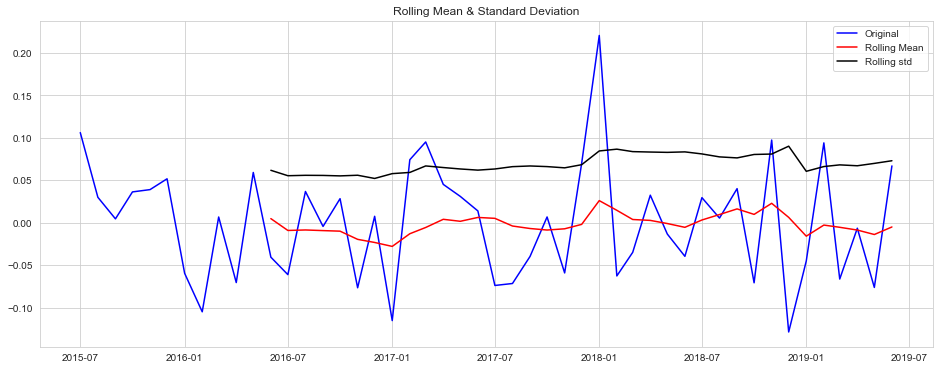

Results of D-F Test


KeyError: 'Raipur'

In [18]:
plt.figure(figsize=(16, 6))
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData )

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


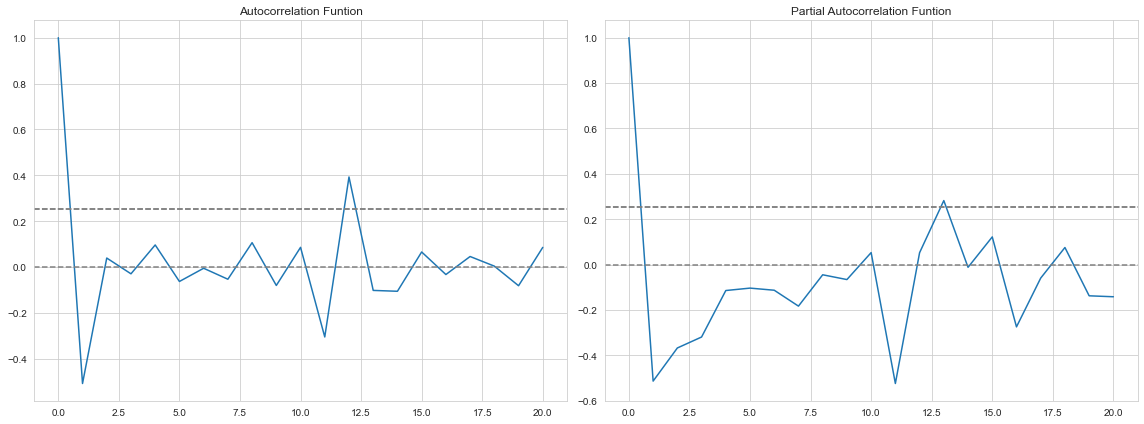

In [19]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot ACF:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Funtion')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Funtion')
plt.tight_layout()

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Plotting AR model


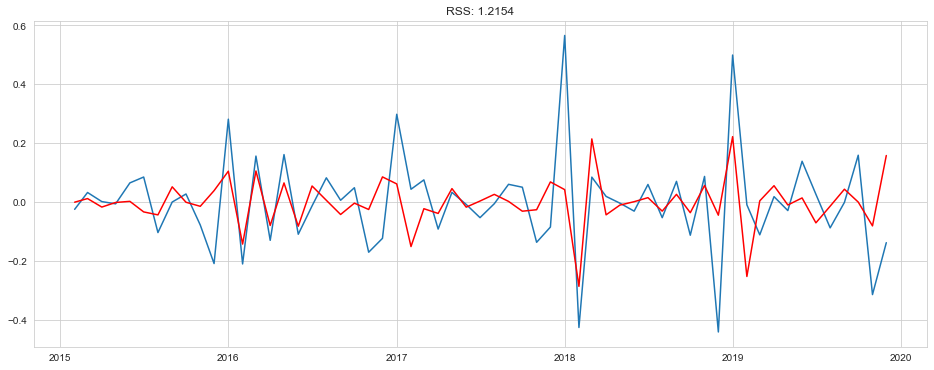

In [20]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(Dataset_log, order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(16, 6))
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Raipur"])**2))
print('Plotting AR model')

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA model


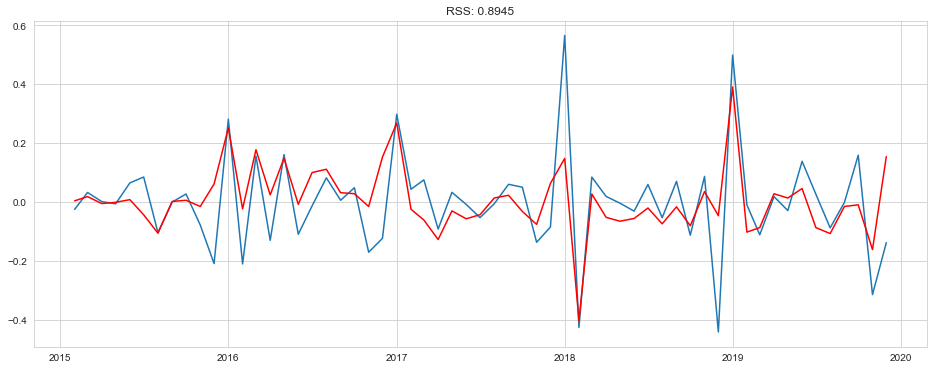

In [21]:
model = ARIMA(Dataset_log, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(16, 6))
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Raipur"])**2))
print('Plotting MA model')

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warn

Plotting ARIMA model


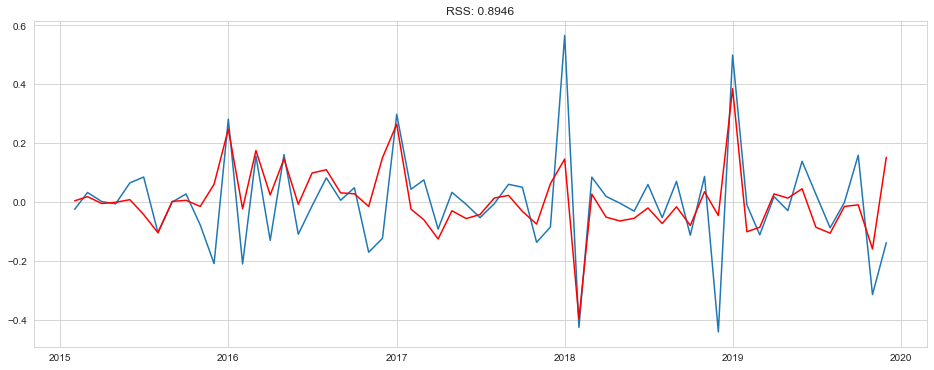

In [22]:
model = ARIMA(Dataset_log, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(16, 6))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Raipur"])**2))
print('Plotting ARIMA model')

In [23]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
2015-02-01    0.004051
2015-03-01    0.018278
2015-04-01   -0.005033
2015-05-01   -0.000909
2015-06-01    0.008058
dtype: float64


In [24]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
2015-02-01    0.004051
2015-03-01    0.022330
2015-04-01    0.017297
2015-05-01    0.016388
2015-06-01    0.024447
dtype: float64


In [25]:
predictions_ARIMA_log = pd.Series(Dataset_log["Raipur"], index=Dataset_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
2015-01-01    6.481577
2015-02-01    6.460821
2015-03-01    6.511535
2015-04-01    6.508021
2015-05-01    6.501023
dtype: float64

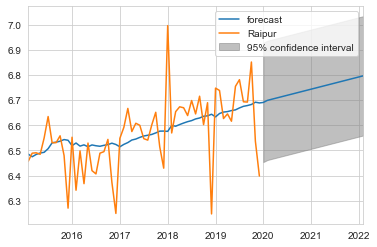

In [26]:
results_ARIMA.plot_predict(1,85)
x=results_ARIMA.forecast(steps=60)

In [27]:
X

NameError: name 'X' is not defined

# SARIMAX

In [28]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(Dataset['Raipur'], order = (1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\base\model.py:566: Con

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Raipur   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -274.891
Date:                            Tue, 31 Aug 2021   AIC                            559.782
Time:                                    14:52:25   BIC                            569.033
Sample:                                01-01-2015   HQIC                           563.263
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0158      0.256     -0.062      0.951      -0.517       0.486
ma.L1         -0.7943      0.218     -3.642      0.000      -1.222      -0.367
ar.S.L12      -0.1542      0.550     -0.280      0.779      -1.233       0.924
ma.S.L12      -0.9945     80.252     -0.012      0.990    -158.286     156.297
sigma2      4330.5475   3.45e+05      0.013      0.990   -6.72e+05    6.81e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                60.63
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                             1.42
Prob(H) (two-sided):                  0.32   Kurtosis:                         7.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates = [Dataset.index[-1]+DateOffset(months=x) for x in range(0,24)]

<AxesSubplot:xlabel='Month'>

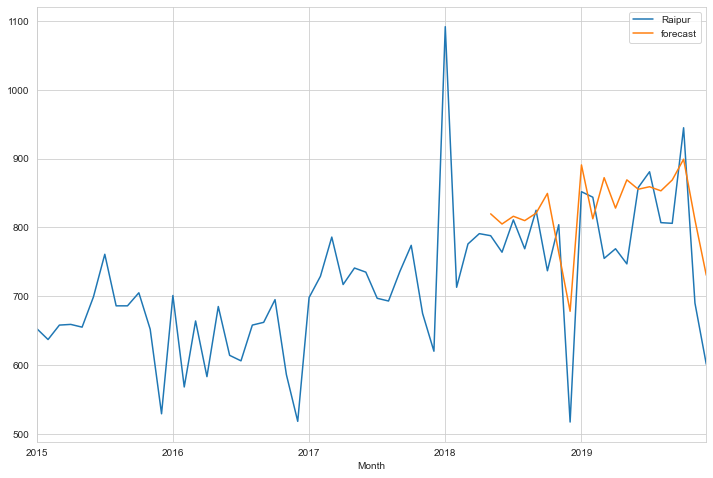

In [31]:
#Orange line are Forecast value respect of original value
Dataset['forecast']=results.predict(start=40,end=100,dynamic=True)
Dataset[['Raipur','forecast']].plot(figsize=(12,8))

In [32]:
future_dates_ds = pd.DataFrame(index= future_dates[1:], columns=Dataset.columns)

In [33]:
future_dates_ds.tail()

,Raipur,forecast
2021-07-01,NaN,NaN
2021-08-01,NaN,NaN
2021-09-01,NaN,NaN
2021-10-01,NaN,NaN
2021-11-01,NaN,NaN


<AxesSubplot:>

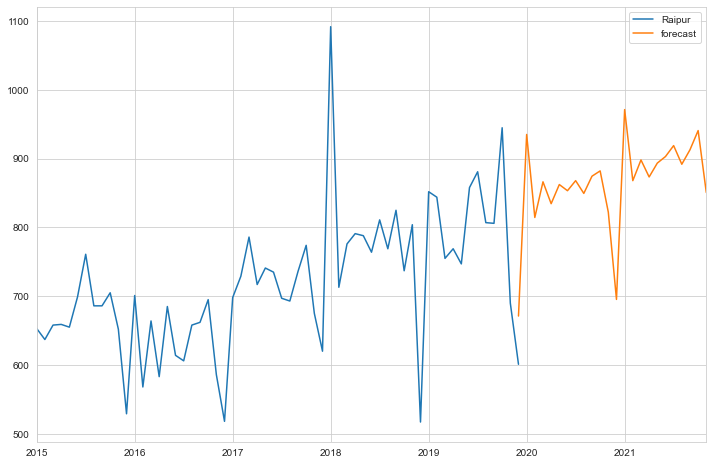

In [34]:
future_Dataset = pd.concat([Dataset, future_dates_ds])
future_Dataset['forecast'] = results.predict(start = 59, end = 120, dynamic = True)
future_Dataset[['Raipur', 'forecast']].plot(figsize=(12,8))

                Raipur
Month                 
2015-01-01         NaN
2015-02-01         NaN
2015-03-01         NaN
2015-04-01         NaN
2015-05-01         NaN
2015-06-01         NaN
2015-07-01         NaN
2015-08-01         NaN
2015-09-01         NaN
2015-10-01         NaN
2015-11-01         NaN
2015-12-01  665.000000
2016-01-01  669.000000
2016-02-01  663.250000
2016-03-01  663.750000
2016-04-01  657.416667
2016-05-01  659.916667
2016-06-01  652.833333
2016-07-01  639.916667
2016-08-01  637.583333
2016-09-01  635.583333
2016-10-01  634.750000
2016-11-01  629.250000
2016-12-01  628.333333
2017-01-01  628.083333
2017-02-01  641.500000
2017-03-01  651.666667
2017-04-01  662.833333
2017-05-01  667.500000
2017-06-01  677.583333
2017-07-01  685.166667
2017-08-01  688.083333
2017-09-01  694.250000
2017-10-01  700.833333
2017-11-01  708.250000
2017-12-01  716.750000
2018-01-01  749.583333
2018-02-01  748.250000
2018-03-01  747.416667
2018-04-01  753.583333
2018-05-01  757.500000
2018-06-01 

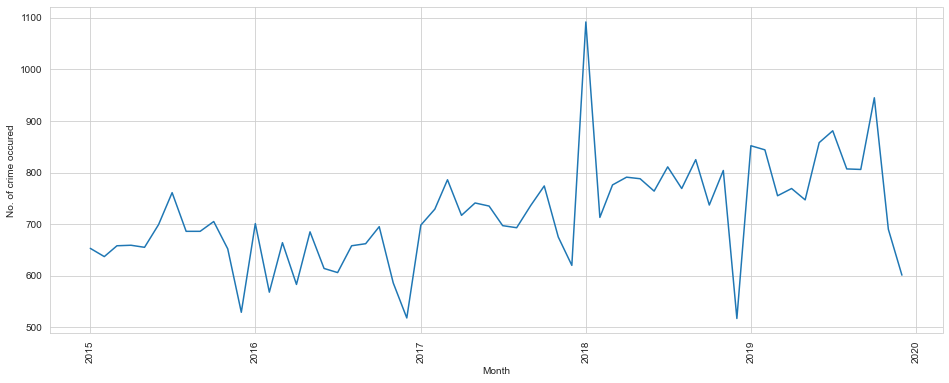

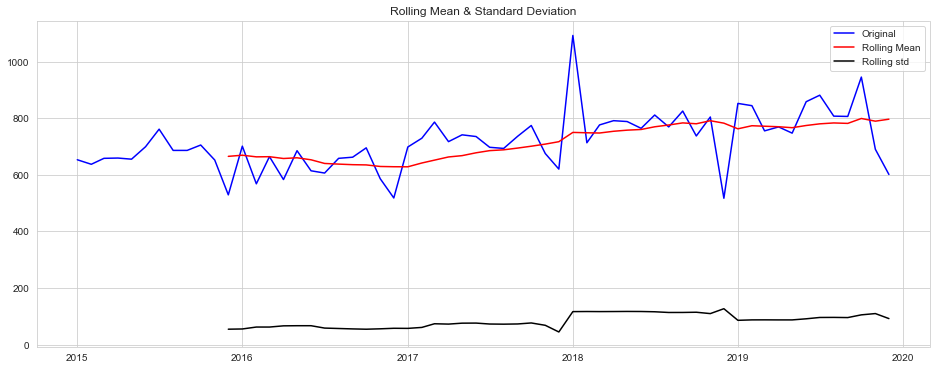

Results of Dickey-Fuller Test:
Test Statistic                 -1.902926
P-value                         0.330686
Lags Useed                      3.000000
Number of observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


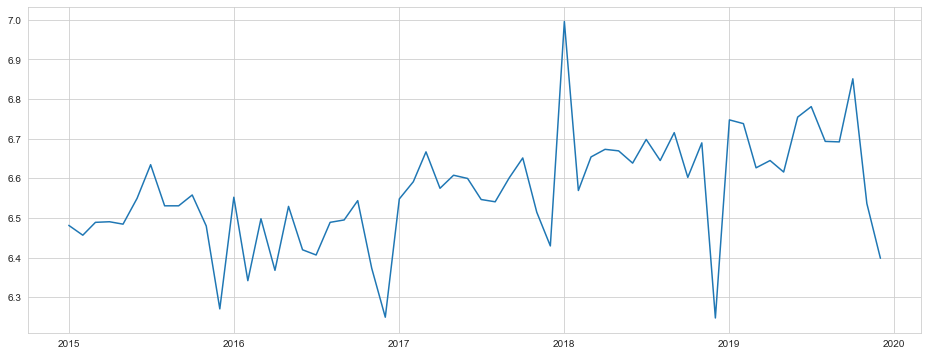

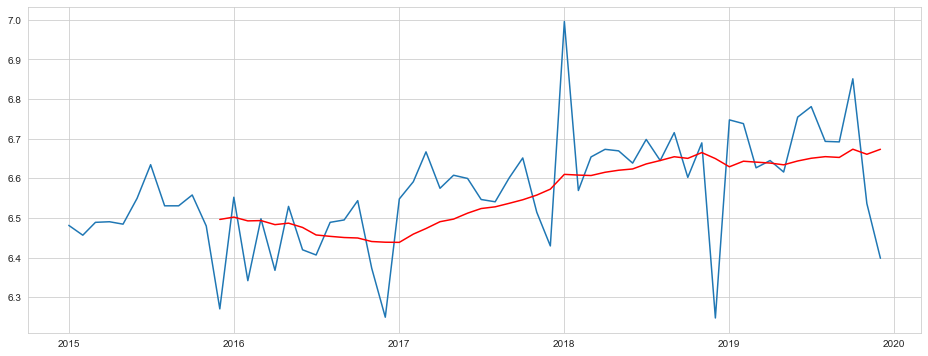

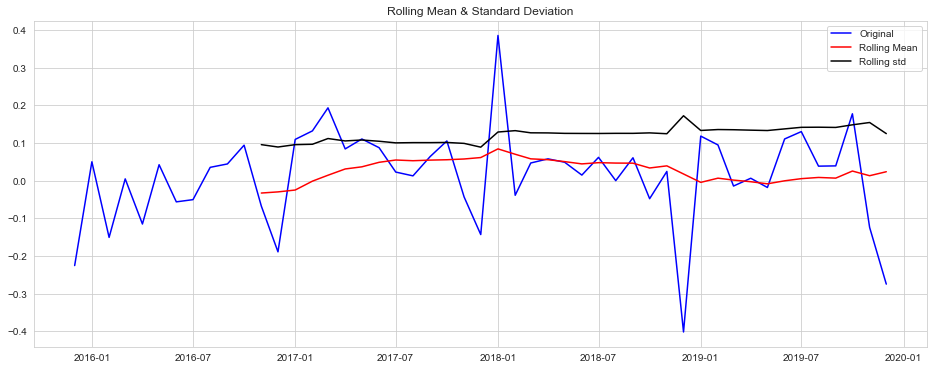

Results of D-F Test
Test Statistic                -7.086270e+00
P-value                        4.530028e-10
Lags Useed                     0.000000e+00
Number of observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
dtype: float64
Test Statistic                -7.086270e+00
P-value                        4.530028e-10
Lags Useed                     0.000000e+00
Number of observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
dtype: float64
Test Statistic                -7.086270e+00
P-value                        4.530028e-10
Lags Useed                     0.000000e+00
Number of observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


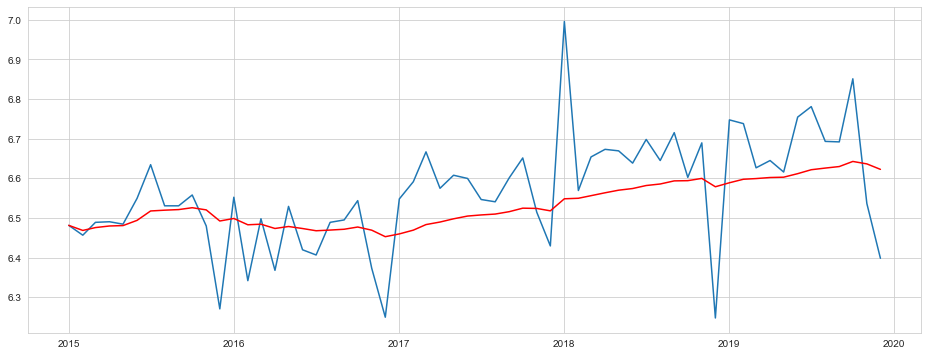

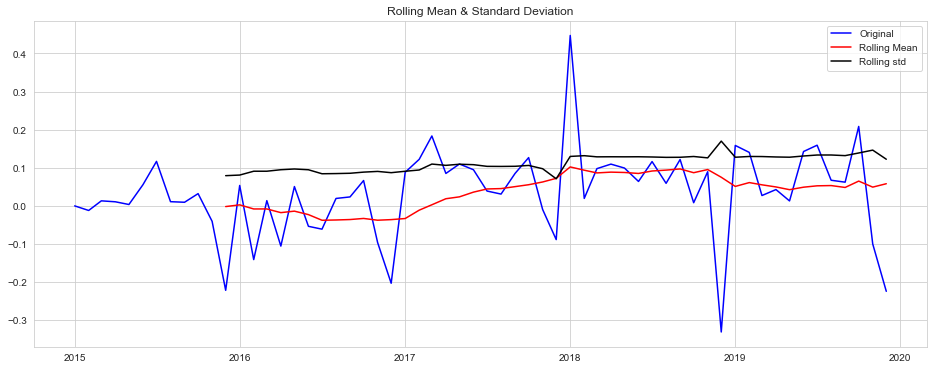

Results of D-F Test
Test Statistic                -7.071144e+00
P-value                        4.933672e-10
Lags Useed                     0.000000e+00
Number of observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
dtype: float64
Test Statistic                -7.071144e+00
P-value                        4.933672e-10
Lags Useed                     0.000000e+00
Number of observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
dtype: float64
Test Statistic                -7.071144e+00
P-value                        4.933672e-10
Lags Useed                     0.000000e+00
Number of observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64


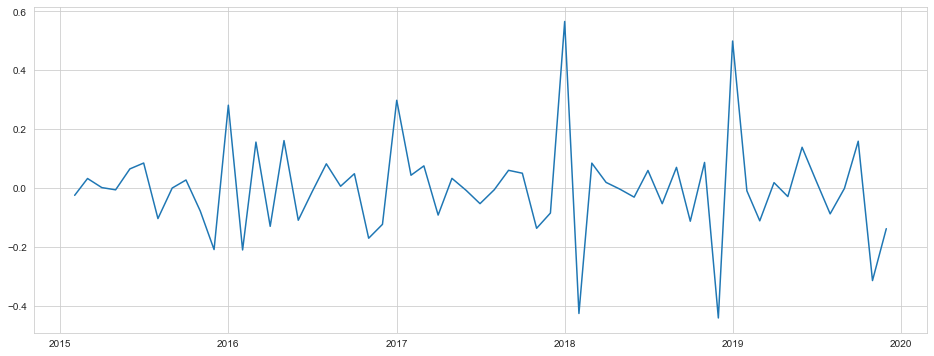

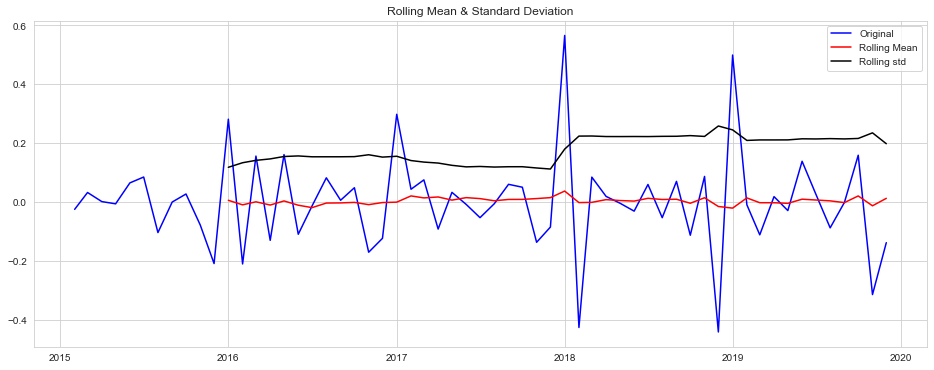

Results of D-F Test
Test Statistic                 -4.006503
P-value                         0.001377
Lags Useed                     10.000000
Number of observations Used    48.000000
Critical Value (1%)            -3.574589
dtype: float64
Test Statistic                 -4.006503
P-value                         0.001377
Lags Useed                     10.000000
Number of observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
dtype: float64
Test Statistic                 -4.006503
P-value                         0.001377
Lags Useed                     10.000000
Number of observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


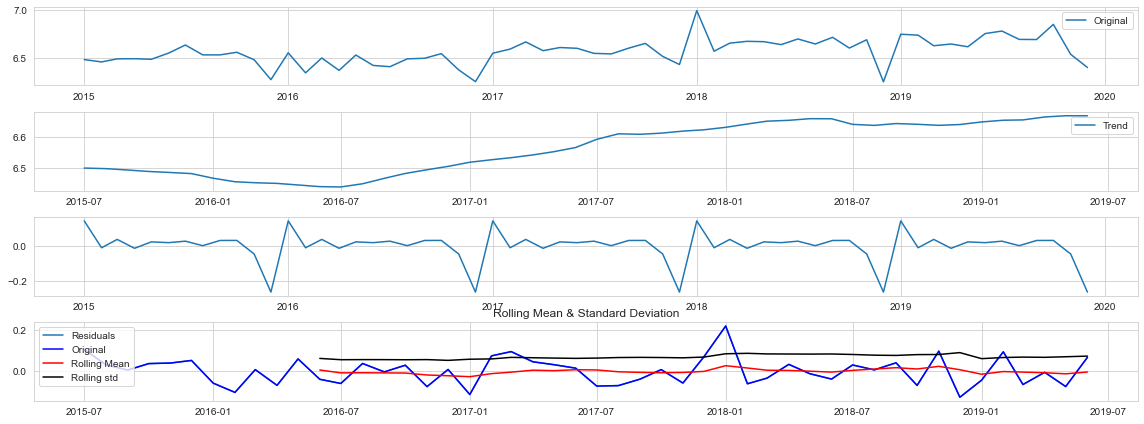

Results of D-F Test


KeyError: 'Raipur'

In [35]:
# Time Series

dataset = pd.read_csv("CG_IPC 15 - 19.csv")
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
Dataset = dataset.set_index(['Month'])

Dataset

plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("No. of crime occured")
plt.plot(Dataset)

#as we can see the data is not stationary, theres an upward trend..it keeps on fluctuating
#there are 2 diff ways by which you can check the stationarity of the data. 1-by rolling mean and rolling std and 2-by dickey-fuller test 
rolmean = Dataset.rolling(window=12).mean()
rolstd = Dataset.rolling(window=12).std()
print(rolmean, rolstd)

plt.figure(figsize=(16, 6))
orig = plt.plot(Dataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = "Rolling std")
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#from the above graph you can see that the std and mean is not constant, it keeps on changing
#dickey fuller test
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(Dataset['Raipur'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value', 'Lags Useed', 'Number of observations Used'])
for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

plt.figure(figsize=(16, 6))
Dataset_log = np.log(Dataset)
plt.plot(Dataset_log)

movingAverage = Dataset_log.rolling(window=12).mean()
movingSTD = Dataset_log.rolling(window=12).std()
plt.figure(figsize=(16, 6))
plt.plot(Dataset_log)
plt.plot(movingAverage, color='red')

#finding the difference of the two types
#the data can be made stationary by diff ways such as taking log ,squaring, cube root etc
datasetLogMinusMovingAverage = Dataset_log - movingAverage
datasetLogMinusMovingAverage.head(12)

datasetLogMinusMovingAverage.dropna(inplace=True)
datasetLogMinusMovingAverage.head(10)

# the code for a  DCF 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window= 12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = "Rolling std")
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of D-F Test')
    dftest = adfuller(timeseries['Raipur'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value', 'Lags Useed', 'Number of observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

plt.figure(figsize=(16, 6))
test_stationarity(datasetLogMinusMovingAverage)

exponentialDecayWeightedAverage = Dataset_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.figure(figsize=(16, 6))
plt.plot(Dataset_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

plt.figure(figsize=(16, 6))
datasetLogMinusMovingExponentialDecayAverage = Dataset_log - exponentialDecayWeightedAverage
test_stationarity(datasetLogMinusMovingExponentialDecayAverage)

plt.figure(figsize=(16, 6))
datasetLogDiffShifting = Dataset_log - Dataset_log.shift()
plt.plot(datasetLogDiffShifting)

plt.figure(figsize=(16, 6))
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Dataset_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 6))
plt.subplot(411)
plt.plot(Dataset_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData )

plt.figure(figsize=(16, 6))
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData )

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot ACF:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Funtion')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Funtion')
plt.tight_layout()

from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(Dataset_log, order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(16, 6))
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Raipur"])**2))
print('Plotting AR model')

model = ARIMA(Dataset_log, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(16, 6))
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Raipur"])**2))
print('Plotting MA model')

model = ARIMA(Dataset_log, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(16, 6))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Raipur"])**2))
print('Plotting ARIMA model')

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

predictions_ARIMA_log = pd.Series(Dataset_log["Raipur"], index=Dataset_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

results_ARIMA.plot_predict(1,85)
x=results_ARIMA.forecast(steps=60)

X

# SARIMAX

import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(Dataset['Raipur'], order = (1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

results.summary()

from pandas.tseries.offsets import DateOffset
future_dates = [Dataset.index[-1]+DateOffset(months=x) for x in range(0,24)]

#Orange line are Forecast value respect of original value
Dataset['forecast']=results.predict(start=40,end=100,dynamic=True)
Dataset[['Raipur','forecast']].plot(figsize=(12,8))

future_dates_ds = pd.DataFrame(index= future_dates[1:], columns=Dataset.columns)

future_dates_ds.tail()

future_Dataset = pd.concat([Dataset, future_dates_ds])
future_Dataset['forecast'] = results.predict(start = 59, end = 120, dynamic = True)
future_Dataset[['Raipur', 'forecast']].plot(figsize=(12,8))

